<a href="https://colab.research.google.com/github/FarahAhmedAtef/Regression-and-Classification-Problem-understanding-and-Analysis/blob/main/Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Ahmed Atef

ID: 55-6886

Tutorial: 10

---

Name: Malak Amgad

ID: 55-3409

Tutorial: 10


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

Here we are checking the data types of the attributes to make sure that they align with the values.

In [ ]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


We are checking null values to make sure that there are no missing values.

For the coming two cells, we are checking the unique values to make sure that there are no any fillers such as "-" or "?" that needs to be treated as missing value and be replaced.

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


Here we are populating a list categorical_col with the names of the columns that are of categorical data type to be used in later steps (encoding)

## Data Cleaning

In [ ]:
df = df.drop(columns=['customerID'])



Here we dropped the Customer ID column because it is a unique identifier that has no effect on the prediction.
Just as mentioned in the lecture example, student IDs have no effect on the prediction  

In [ ]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)

df.rename(columns={'MonthlyCharges': 'MonthlyCharges($)'}, inplace=True)

print(df['MonthlyCharges($)'].head())

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges($), dtype: float64


Here we removed the "/m" and dollar sign from the values and included the dollar sign in the column name such that we can manupilate this column as numeric rather than object because monetary values are usually numeric. This is done through changing its type to float.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float)

df.rename(columns={'TotalCharges': 'TotalCharges($)'}, inplace=True)

print(df['TotalCharges($)'].head())


0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges($), dtype: float64


Here we removed the dollar sign from the values and included the dollar sign in the column name such that we can manupilate this column as numeric rather than object because monetary values are usually numeric. This is done through changing its type to float.

In [ ]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges($)'] = pd.to_numeric(df['MonthlyCharges($)'], errors='coerce')

df['TotalCharges($)'] = df['TotalCharges($)'].fillna(df['tenure'] * df['MonthlyCharges($)'])

print(df['TotalCharges($)'].isnull().sum())


0


Here we are filling the missing values that were identified in the inspection step by multiplying the tenure by the monthly charges to get the total charges.

In [ ]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7027,One year
7028,One year
7029,Month-to-month
7030,Month-to-month


Here we are changing the contract into category type defing the order of the values  because an order can be identified among its values; thus, this step is needed to prepare for the label encoding step.

In [ ]:
categorical_features = categorical_col.copy()

Here we are copying the categorical columns that we stored in another list as a temp that will be used to encode them in later step and remove any column that has been encoded prior to the others to ensure that only current categorical columns are included in it for encoding.

In [ ]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


Here we encoded the targeted attribute "Churn" first because it will be used in the coming visualisation steps. We used label encoding for it because it is a binary attribute that has only "Yes" and "No" values.

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

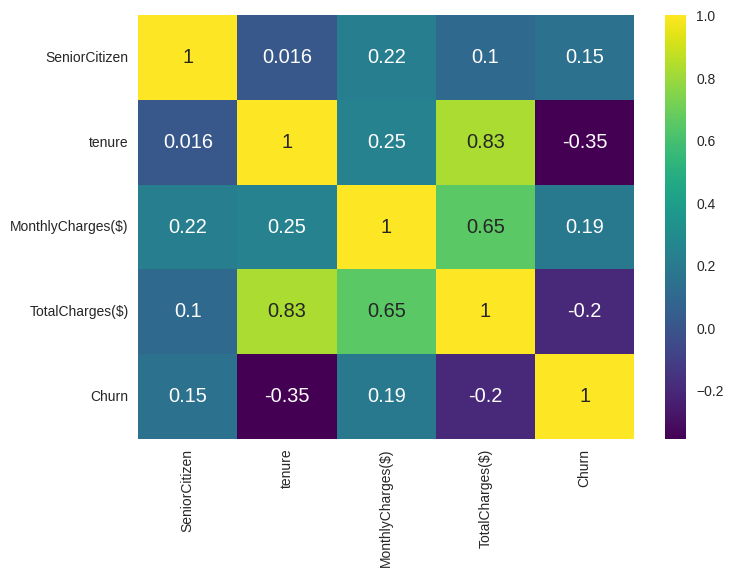

In [ ]:
corr = df.corr(numeric_only=True)
corr
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())
sns.heatmap(corr, cmap='viridis', annot = True);

Here we made a heat map to see the correlation between churn and the numerical attributes

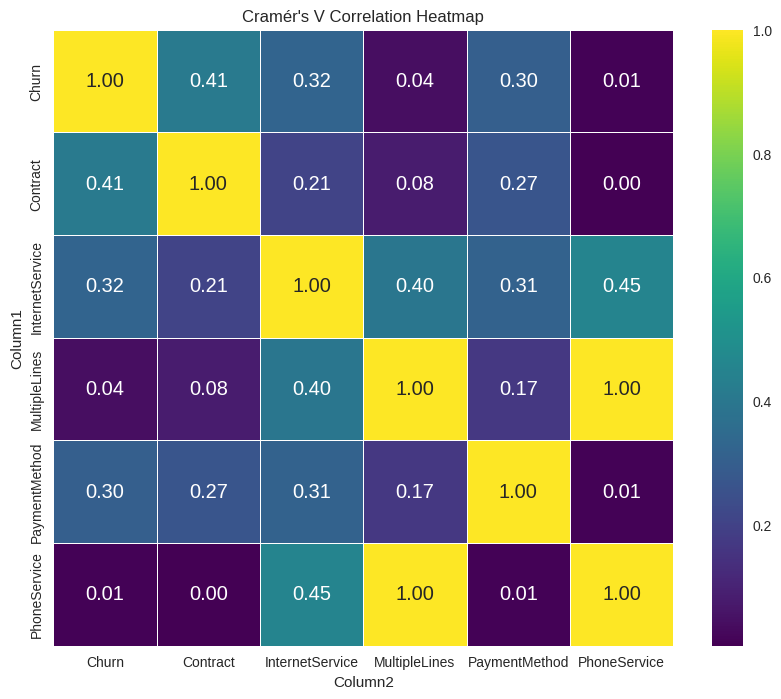

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.values.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

categorical_columns = ['Churn', 'InternetService', 'PhoneService', 'Contract', 'PaymentMethod', 'MultipleLines']

cramers_v_dict = {}

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i:]:
        if col1 == col2:
            cramers_v_dict[(col1, col2)] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_dict[(col1, col2)] = cramers_v(confusion_matrix)
            cramers_v_dict[(col2, col1)] = cramers_v(confusion_matrix)

cramers_v_matrix = pd.DataFrame.from_dict(cramers_v_dict, orient='index', columns=['CramersV']).reset_index()
cramers_v_matrix[['Column1', 'Column2']] = pd.DataFrame(cramers_v_matrix['index'].tolist(), index=cramers_v_matrix.index)
cramers_v_matrix.drop(columns='index', inplace=True)
cramers_v_pivot = cramers_v_matrix.pivot(index='Column1', columns='Column2', values='CramersV')

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_pivot, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap")
plt.show()




This heat map is showing the correlation between the churn and the categorical attributes

**Answer for Q1**: According to the numerical heat map, the most  correlated attribute with Churn is the tenure because it has the highest strength shown by the absolute numeric value (-0.35); however, it is negatively correlated because of the negative sign. As for the categorical heat map, the most correlated attribute with churn is the contract column because it has the highest strength shown by the numeric value and it is positively correlated with churn shown by the positive sign (0.41).

**Q2: Which payment method has the highest churn rate?**

**Visualization**

<ipython-input-124-8ee4102b3490>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


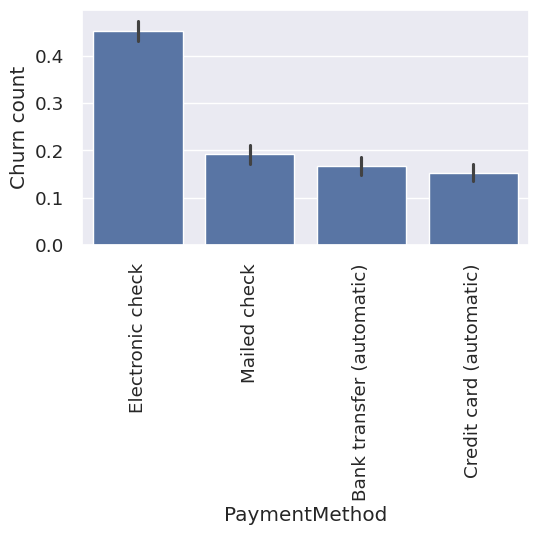

In [ ]:
import math

num_features = len(categorical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

sns.set(font_scale=1.2)
plt.figure(figsize=(num_cols * 5, num_rows * 5))

column= 'PaymentMethod'
plt.subplot(num_rows, num_cols, 1)
g = sns.barplot(x=column, y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn count')
plt.xlabel(f'{column}')

plt.tight_layout()
plt.show()


**Answer for Q2**: Electronic check is the one with the highest churn rate  as it is the one with the highes count shown above.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

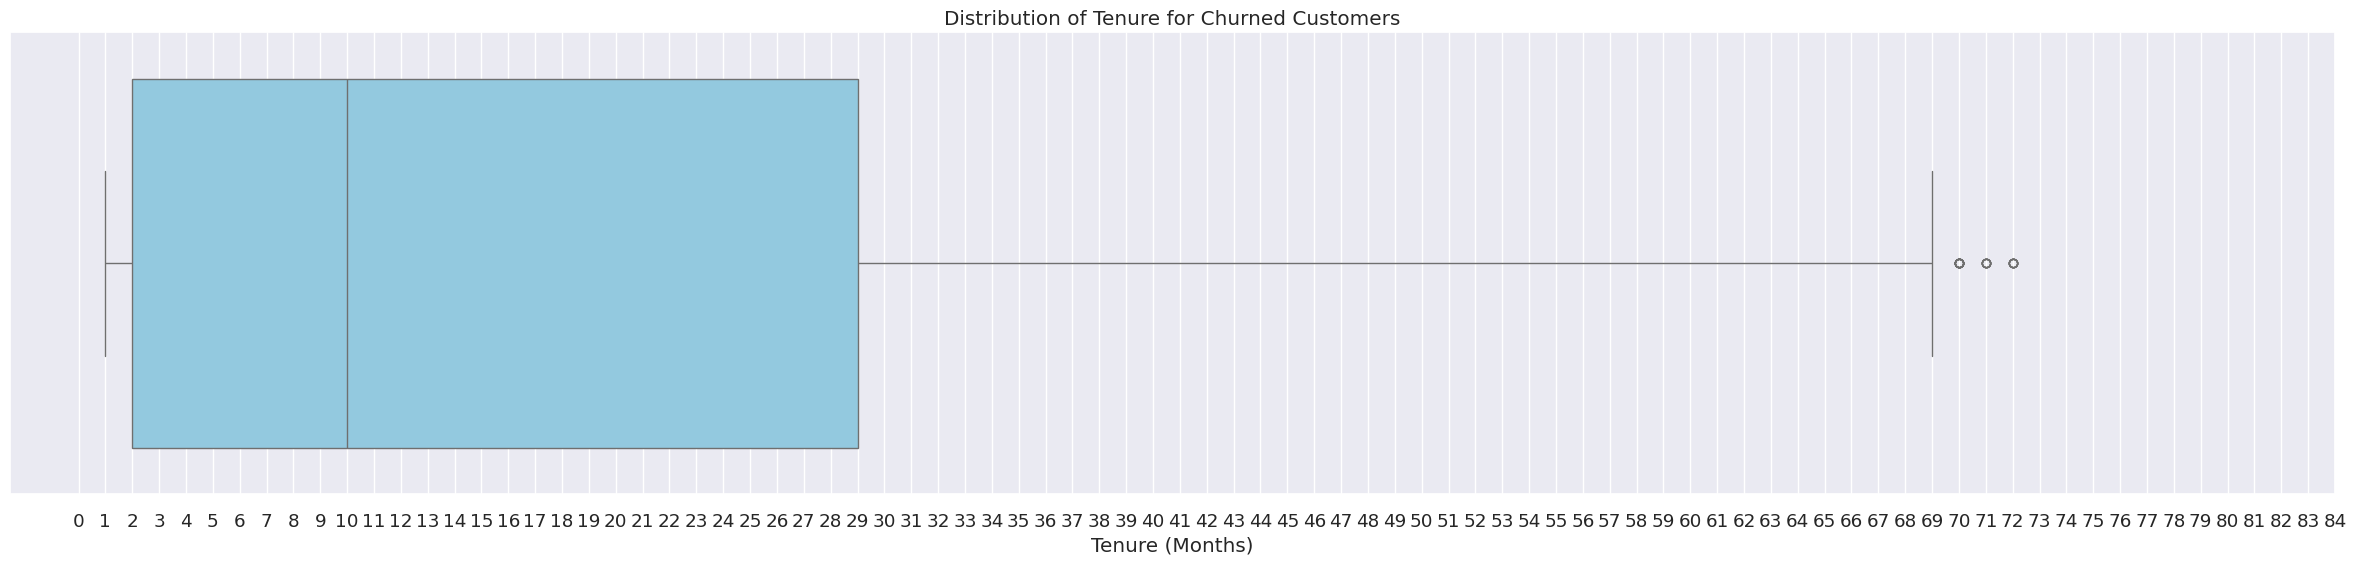

In [ ]:
churned_customers = df[df['Churn'] == 1]

plt.figure(figsize=(30, 6))
sns.boxplot(x=churned_customers['tenure'], color='skyblue')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.xticks(np.arange(0, 85, 1))
plt.show()

**Answer for Q3**: After 2 months, 25% of customers will churn
After 10 months, 50% of customers will churn
After 29 months, 75% of customers will churn

## Data Preparation for Modelling

In [ ]:
# df = df.drop(columns=['PhoneService'])
df = df.drop(columns=['MultipleLines'])
df = df.drop(columns=['MonthlyCharges($)'])
# df = df.drop(columns=['PaperlessBilling'])


Here we dropped these columns based on trial and error to get the best values for the recall, precesion and F1_score and inspecting the correlation between the independent and target variable namely churn where monthly charges correlation coefficient is 0.19 which is more close to the zero indicating low positive correlation. Same goes for the MultipleLines where the correlation coefficient is 0.04.

In [ ]:
df_encoded = df.copy()

Here we copied the dataframe to another one where encoding will be applied on.

In [ ]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

,Contract
0,0
1,1
2,0
3,1
4,0
...,...
7027,1
7028,1
7029,0
7030,0


Here we are applying label encoding to contract after it has been changed to type category because there is an order shown in the values of this column.

In [ ]:
categorical_features.remove('Contract')
categorical_features.remove('customerID')
categorical_features.remove('MultipleLines')
categorical_features.remove('MonthlyCharges')
categorical_features.remove('TotalCharges')
categorical_features.remove('Churn')


After contract is encoded, it is no longer categorical; thus, it is removed from the list including the categorical columns.
After dropping the customerId , it should be removed from the list of categorical features and after changing the type of monthly and total charges to float they need to removed as well such that they won't be encoded.
After encoding the churn, it needs to be removed from the list of categorical as well such that it won't be encoded again.

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features,dtype='int8')



print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   TotalCharges($)                          7032 non-null   float64
 4   Churn                                    7032 non-null   int8   
 5   gender_Female                            7032 non-null   int8   
 6   gender_Male                              7032 non-null   int8   
 7   Partner_No                               7032 non-null   int8   
 8   Partner_Yes                              7032 non-null   int8   
 9   Dependents_No                            7032 non-null   int8   
 10  Dependents_Yes                           7032 no

The rest of the categorical columns are then encoded using one hot encoding. Although some of these columns are binary having only two values;thus, should be label encoded. But to do it in one step, we did for all of them one hot encoding and the redundancy will be removed in the coming step.

In [ ]:
df_encoded= df_encoded.drop(columns=['gender_Male','Partner_No','Dependents_No','PaperlessBilling_No', 'PhoneService_No'])

Here we removed the redundant columns for the binary columns after encoding to achieve the same result of label encoding.

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here we splitted the data to 70% training and 30% testing data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Here we built the decision tree by feeding it with the training data

### Tree Visualization

In [ ]:
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
graph

# Alternatively, to export the graph to a file, uncomment the line below:
# graph.render('Churn')

Here we displayed the tree, its splits and branches that has been built in the previous step.

If the customer has a month-to month contract and does not have a fiber optic internet service but has an internet service and tenure is less than 3.5 months and is a senior citizen and total charges is less than or equal to 45.175, then the customer will churn.

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Here we are evaluating the tree performance by providing inputs: the tree classifier, training and test data and whether it is test or training data. And evaluates accuracy, precision and recall and f1_score.

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998342     0.999233  0.998578     0.998787      0.998579
recall        0.999723     0.995413  0.998578     0.997568      0.998578
f1-score      0.999032     0.997319  0.998578     0.998176      0.998577
support    3614.000000  1308.000000  0.998578  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 72.04%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.819029    0.476112  0.720379     0.647570      0.727855
recall        0.794706    0.515152  0.720379     0.654929      0.720379
f1-score      0.806684    0.494863  0.720379     0.650774      0.723778
support    1549.000000  561.000000  

Here we displayed accuracy, precision and recall and f1_score that has been calculated for the training and testing data.

For the training data, the accuracy was so high which means that the classifier was so good to make predictions for the training data where almost all the predictions on the training set was correct. the precision value for class 0(no) means that 99.8% of the predictions for this class was right while for class 1(yes) means that 99.9% of the predictions for the yes class were right. The recall values mean that 99.9% of the actual 0s were identified correctly by the classifier while 99.5% of the actual 1s were correctly identified. According to the F1_score, the model performs slightly better at classifying class 0 this was shown by the slightly larger F1_score of 99.9% compared to 99.7% for classes 0 and 1 respectively.

For the testing data, the accuracy was lower in comparison to the training data where the classifier made lower correct predictions when it comes to testing set compared to the training data. The precision value means that for class 0 81.9% of the predictions for this class was correct while for class 1(yes) means that 47.6% of the predictions for the yes class were right. The recall values mean that 79.4% of the actual 0s were identified correctly by the classifier while 51.5% of the actual 1s were correctly identified. According to the F1_score, the model performs better at classifying class 0 this was shown by the larger F1_score of 80.6% compared to 49.4% for classes 0 and 1 respectively.


The confusion matrices show the count of the True positives, true negatives, false positives and false negatives that will summarised in the chart below for the test data.

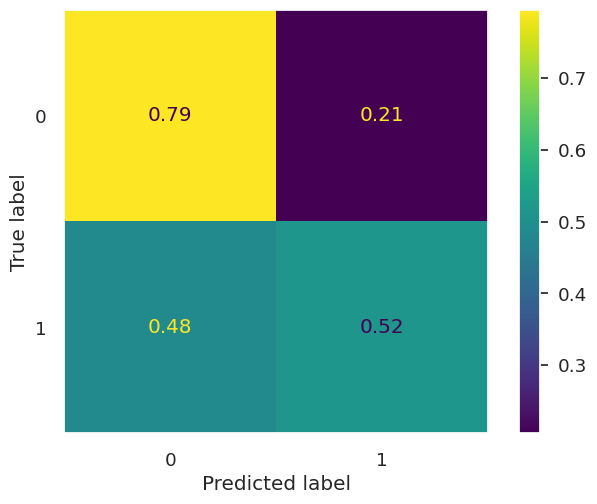

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

The confusion matrix above means that 52% of the instances belonging to class 1 were actually classified as 1 while 48% were incorrectly classifies as class 0 (false negative). It also shows that 79% of the instances belonging to class 0 were classified correctly as 0 while 21% were classified incorrectly as class 1 (false positive).

In [ ]:
churned_count = len(df_encoded[df_encoded['Churn'] == 1])

not_churned_count = len(df_encoded[df_encoded['Churn'] == 0])

print(f"Number of churned customers (1): {churned_count}")
print(f"Number of non-churned customers (0): {not_churned_count}")

Number of churned customers (1): 1869
Number of non-churned customers (0): 5163


We are counting the number of the churners and non churners to determine which evaluation measures are we more interested in.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.47611202635914335
Recall:  0.5151515151515151
F1_score:  0.4948630136986301


Here we are again displaying the precision, recall and F1_score for the positive class(1 or yes) because this class is more important in our case as we are more concerned about churners(this might show that this attribute is an asymmetric binary variable). We are focusing on these measures rather than the accuracy because Significant majority of the negative class and minority of
the positive class can be seen from the above step showing the problem of class imbalance


## Bonus (Optional)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Here I applied logistic regression classification instead of the decision tree. I built the model and fed it with the training data.

In [ ]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)

print_score(log_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 80.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.849961     0.657168  0.805973     0.753564      0.798727
recall        0.893470     0.564220  0.805973     0.728845      0.805973
f1-score      0.871172     0.607158  0.805973     0.739165      0.801012
support    3614.000000  1308.000000  0.805973  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3229  385]
 [ 570  738]]

Test Result:
Accuracy Score: 79.95%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.844132    0.645570  0.799526     0.744851      0.791339
recall        0.891543    0.545455  0.799526     0.718499      0.799526
f1-score      0.867190    0.591304  0.799526     0.729247      0.793838
support    1549.000000  561.000000  

Here we displayed accuracy, precision and recall and f1_score that has been calculated for the training and testing data using the logistic regression classifier this time.

For the training data, the accuracy was 80.6% which means that the classifier was good to make predictions for the training data where 80.6% of the predictions on the training set was correct. the precision value for class 0(no) means that 84.9% of the predictions for this class was right while for class 1(yes) means that 65.7% of the predictions for the yes class were right. The recall values mean that 89.3% of the actual 0s were identified correctly by the classifier while 56.4% of the actual 1s were correctly identified. According to the F1_score, the model performs better at classifying class 0 this was shown by the larger F1_score of 87.1% compared to 60.7% for classes 0 and 1 respectively.

For the testing data, the accuracy was almost equivalent to the training data where the classifier made almost same amount of correct predictions when it comes to testing set compared to the training data. The precision value means that for class 0 84.4% of the predictions for this class was correct while for class 1(yes) means that 64.5% of the predictions for the yes class were right. The recall values mean that 89.1% of the actual 0s were identified correctly by the classifier while 54.5% of the actual 1s were correctly identified. According to the F1_score, the model performs better at classifying class 0 this was shown by the larger F1_score of 86.7% compared to 59.1% for classes 0 and 1 respectively.


The confusion matrices show the count of the True positives, true negatives, false positives and false negatives that will summarised in the chart below for the test data.

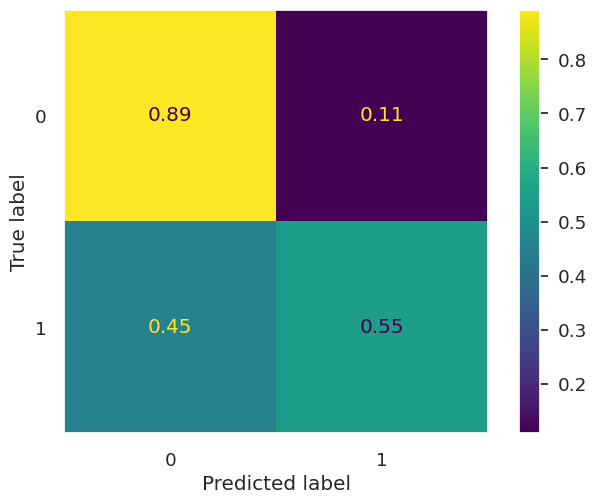

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_reg.predict(X_test), labels=log_reg.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.grid(False)
plt.show()


The confusion matrix above means that 55% of the instances belonging to class 1 were actually classified as 1 while 45% were incorrectly classifies as class 0 (false negative). It also shows that 89% of the instances belonging to class 0 were classified correctly as 0 while 11% were classified incorrectly as class 1 (false positive).

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = log_reg.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.6455696202531646
Recall:  0.5454545454545454
F1_score:  0.591304347826087


Just as in the decision tree, here we are again displaying the precision, recall and F1_score for the positive class(1 or yes) because this class is more important in our case as we are more concerned about churners(this might show that this attribute is an asymmetric binary variable). We are focusing on these measures rather than the accuracy because Significant majority of the negative class and minority of the positive class can be seen from the step where we viewed the number of churners and non churners showing the problem of class imbalance


# Comparison Comment

We decided to comare according to the precision, recall and f1 score because the problem of class imbalance that was previously mentioned that deems the accuracy measure not so prominent.


When it comes to comparing the decision tree and logistic regression classifiers' performance on training data, the decision tree has higher precision, recall and f1 score for both classes compared to logistic regression.As a summary, decision tree performance is very high when it comes to training set where there can be a likelihood of overfitting whereas logistic regression has moderate performance in this case.


When it comes to the test data, logistic regression slighly outperforms decsion tree considering the precision  especially for class 1. It also shows slight higher recall for the logistics regression classifier compared to the decision tree(especially for class 0). Finally, the same goes for the f1 score where logistice regression has higher score than the decision tree classifier.

As a conclusion, logistic regression shows more stable results across training and test data with higher evaluation measures in comparison to the decision tree that its result decreases significantly between training and testing.

Thus, Logistic regression is preferred over the decision tree because it overcomes the potential problem of overfitting that the decision tree is encountering achieving better generalisation which is good for new data that is unlabelled yet even though it has a bit worse performance when it comes to the training data, but as previously mentioned is steady across both testing and training phases.
